# Esperienza 2
## Misura della focale di una lente divergente sottile
#### Tutte le misure sono in millimetri

In [2]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
graph_base_name = './grafici/graph_'

style = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks'][2]
sns.set_style(style)

In [9]:
# Posizione cavaliere
pos_sorgente = 13.55

# Posizione lente collimatrice
pos_coll = 21.25

# Posizione lente divergente
pos_lente = 320

# dr lente
dr = 5.7 

# Diametro del fascio collimato, distanza tra i due fori del diaframma
d = 10

In [5]:
pd_data = pd.read_csv('data.txt', sep='\t', dtype='float64,float64,float64,str', comment='#')

In [6]:
ds = xr.Dataset(
    data_vars=dict(
        sx=(['op', 'h', 'n'], np.stack([
            np.split(pd_data['sx'].to_numpy(), 20)[::2],
            np.split(pd_data['sx'].to_numpy(), 20)[1::2]
            ])),
        dx=(['op', 'h', 'n'], np.stack([
            np.split(pd_data['dx'].to_numpy(), 20)[::2],
            np.split(pd_data['dx'].to_numpy(), 20)[1::2]
            ]))
    ),
    coords=dict(
        n=('n', range(5)),
        h=('h', pd_data['h'].unique() - pos_lente),
        op=('op', ['L', 'F'])
    )
)

In [7]:
ds

<xarray.Dataset>
Dimensions:  (op: 2, h: 10, n: 5)
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0
  * op       (op) <U1 'L' 'F'
Data variables:
    sx       (op, h, n) float64 3.64 3.49 3.52 3.45 3.49 ... 4.34 4.36 4.44 4.8
    dx       (op, h, n) float64 19.13 19.19 19.22 19.22 ... 65.99 65.9 65.76

In [11]:
da_k = ds.dx-ds.sx

In [12]:
da_k

<xarray.DataArray (op: 2, h: 10, n: 5)>
array([[[15.49, 15.7 , 15.7 , 15.77, 15.72],
        [21.04, 21.  , 21.05, 21.08, 21.  ],
        [25.95, 26.06, 26.13, 25.73, 25.88],
        [31.12, 30.93, 30.97, 31.09, 30.87],
        [36.06, 36.03, 35.79, 36.03, 35.94],
        [42.09, 40.87, 40.67, 40.65, 40.93],
        [45.89, 45.84, 45.77, 45.87, 45.77],
        [50.54, 51.01, 50.35, 50.01, 50.03],
        [56.  , 55.6 , 55.74, 55.65, 55.99],
        [60.54, 60.16, 60.58, 60.58, 60.42]],

       [[15.46, 15.49, 15.52, 15.44, 15.55],
        [20.78, 20.72, 21.01, 20.92, 20.88],
        [25.81, 25.81, 25.87, 25.92, 25.92],
        [31.12, 31.13, 31.25, 31.07, 31.11],
        [35.78, 36.27, 35.96, 36.2 , 36.05],
        [40.99, 41.31, 41.22, 41.63, 40.93],
        [46.35, 46.15, 45.92, 46.13, 45.91],
        [51.08, 51.45, 51.52, 51.5 , 51.12],
        [56.95, 56.45, 56.53, 57.45, 56.95],
        [61.56, 61.64, 61.63, 61.46, 60.96]]])
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0
  * op       (op) <U1 'L' 'F'

In [21]:
ki = da_k.mean(dim=['n','op'])

ki

<xarray.DataArray (h: 10)>
array([15.584, 20.948, 25.908, 31.066, 36.011, 41.129, 45.96 , 50.861,
       56.331, 60.953])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [22]:
ki_sig = (((da_k - ki) ** 2).sum(dim=['n','op']) / 10) ** .5

ki_sig

<xarray.DataArray (h: 10)>
array([0.11791522, 0.11452511, 0.11294246, 0.10603773, 0.1474076 ,
       0.42676574, 0.17910891, 0.55728718, 0.60377893, 0.54014905])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

## Metodo 1

In [23]:
fi = (d * ds.h) / (ki - d)

fi

<xarray.DataArray (h: 10)>
array([107.44985673, 100.4749726 , 100.57832537,  99.68669895,
        99.9577102 ,  99.58559543, 100.11123471, 100.34017768,
        99.28557553, 100.09224187])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [28]:
Dh = 1
Dd = 0.01
Dki = 3 * ki_sig

In [30]:
Dfi = (d*Dh)/(ki-d) + (ds.h*ki*Dd)/(ki-d)**2 + (ds.h*d*Dki)/(ki-d)**2

Dfi

<xarray.DataArray (h: 10)>
array([8.89763973, 4.2588117 , 2.93465393, 2.12705405, 2.22225808,
       4.54865296, 1.90193419, 4.47512996, 4.21817946, 3.49920734])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [32]:
fi_sig = Dfi / 3

fi_sig

<xarray.DataArray (h: 10)>
array([2.96587991, 1.4196039 , 0.97821798, 0.70901802, 0.74075269,
       1.51621765, 0.63397806, 1.49170999, 1.40605982, 1.16640245])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [33]:
wi = fi_sig ** (-2)

wi

<xarray.DataArray (h: 10)>
array([0.11368231, 0.49621014, 1.04502991, 1.9892321 , 1.82244118,
       0.43498763, 2.48800667, 0.44939807, 0.50581582, 0.73502677])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [129]:
f = (wi * fi).sum() / wi.sum()

f

<xarray.DataArray ()>
array(100.09350071)

## Metodo 2

In [59]:
def fit_pes(X,Y,Ysig):
    Ypes = 1 / Ysig ** 2

    N = X.size
    DELTA = Ypes.sum()*(Ypes*X**2).sum() - (Ypes*X).sum() ** 2

    a = ((Ypes*X**2).sum()*(Ypes*Y).sum() - (Ypes*X).sum()*(Ypes*X*Y).sum()) / DELTA    # q
    b = (Ypes.sum()*(Ypes*X*Y).sum() - (Ypes*X).sum()*(Ypes*Y).sum()) / DELTA           # m
    #
    SIGy = ((((a+b*X)-Y)**2).sum()/ (N-2)) ** .5
    SIGa = SIGy * ((X**2).sum() / DELTA) ** .5
    SIGb = SIGy * (N / DELTA) ** .5
    return a, SIGa, b, SIGb

In [109]:
fit_w = fit_pes(ds.h.values, ki.values, ki_sig.values)

fit_w

(9.710409779472574,
 0.005186002310551901,
 0.10113572746300213,
 1.6249955995574922e-05)

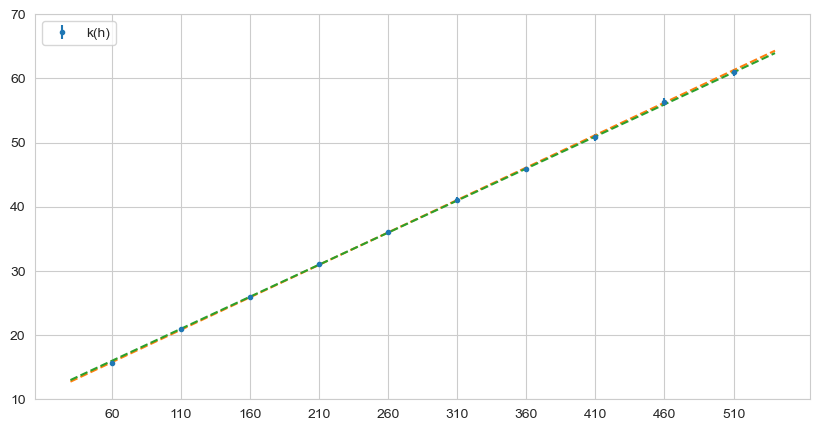

In [142]:
plt.figure(figsize=(10,5))

plt.errorbar(ds.h, ki, fmt='.', yerr=ki_sig, label='k(h)')

X = [30,540]
Yq = [x*fit_w[2]+fit_w[0] for x in X]
Yf = [x*d/f+d for x in X]

plt.plot(X,Yq,'--')
plt.plot(X,Yf,'--')

plt.xticks(ds.h)
plt.yticks(range(10,71,10))

plt.legend(loc='upper left')